# Imports

In [1]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from pycm import ConfusionMatrix
from pandas.plotting import scatter_matrix, andrews_curves, parallel_coordinates
from sklearn.metrics import median_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn
import numpy as np
import os
import pandas as pd
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import os
os.environ["PATH"] += os.pathsep + 'C:/ProgramData/Anaconda3/Library/bin/graphviz/'
import graphviz
from IPython.display import Markdown, display
%matplotlib inline

# plt.style.use(['dark_background'])

def printmd(string):
    display(Markdown(string))

# Importing the csv files

Importing the dataset and storing it in a variable called data

In [2]:
data = pd.read_csv('./data/data.csv')

# Data Exploration

# This dataset as 21 features and 2000 entries. The meanings of the features are given below:

- battery_power: Total energy a battery can store in one time measured in mAh
- blue: Has bluetooth or not
- clock_speed: speed at which microprocessor executes instructions
- dual_sim: Has dual sim support or not
- fc: Front Camera mega pixels
- four_g: Has 4G or not
- int_memory: Internal Memory in Gigabytes
- m_dep: Mobile Depth in cm
- mobile_wt: Weight of mobile phone
- n_cores: Number of cores of processor
- pc: Primary Camera mega pixels
- px_height: Pixel Resolution Height
- px_width: Pixel Resolution Width
- ram: Random Access Memory in Mega Byte
- sc_h: Screen Height of mobile in cm
- sc_w: Screen Width of mobile in cm
- talk_time: longest time that a single battery charge will last when you are
- three_g: Has 3G or not
- touch_screen: Has touch screen or not
- wifi: Has wifi or not
- price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [3]:
print(data.columns)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


In [4]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
data.shape

(2000, 21)

In [6]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

The above info reveals that all attributes are numerical i.e. either float or int

In [7]:
data.describe() 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


The above show some basic metrics for each feature in our dataset

In [8]:
for feature in data.columns:
    mean = data[feature].mean()
    std = data[feature].std()
    treshold = std * 3
    
    lower_bound = mean - treshold
    upper_bound = mean + treshold
    
    data = data[(data[feature] > lower_bound) & (data[feature] < upper_bound)]

In [9]:
data.shape

(1988, 21)

Also we can see that 12 entries were removed in the process of removing the outliers.

## Correlation Matrix and Heatmap

The following code finds the correlation matrix of our dataset and plots a heatmap of it

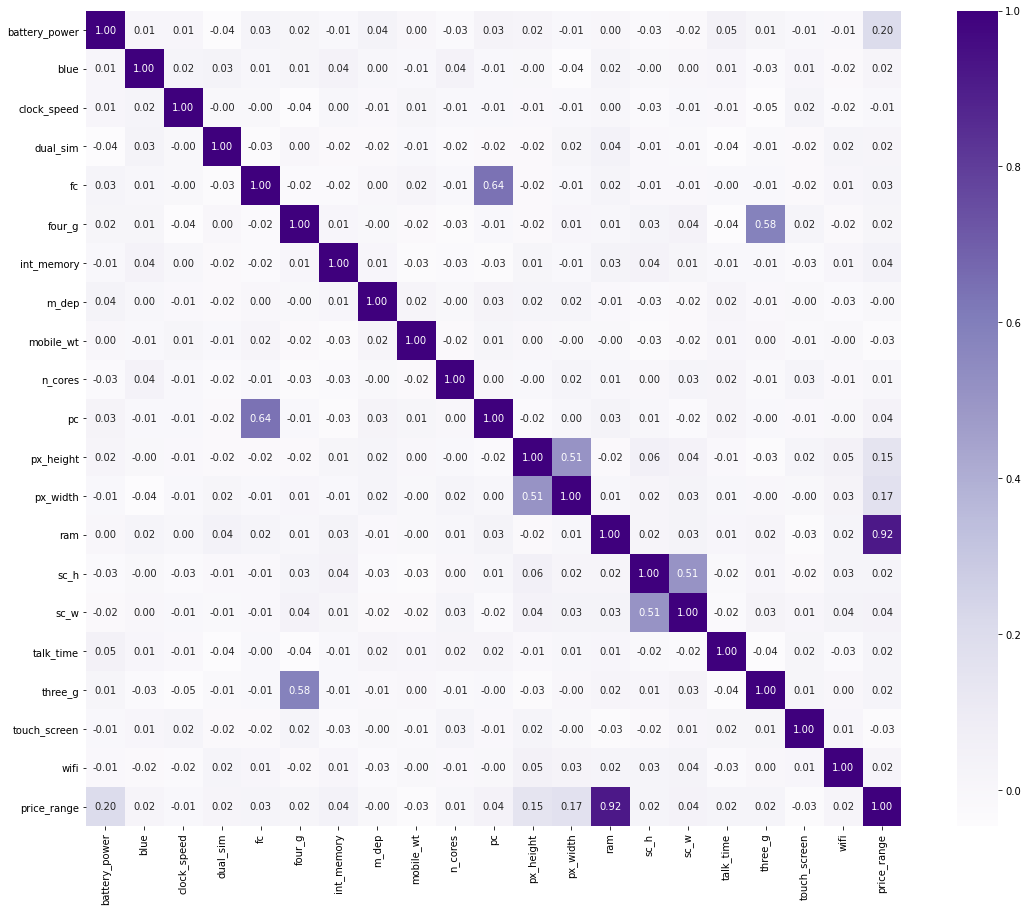

In [10]:
corr_matrix = data.corr()
# increases the resolution of the plot
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, square=True, cmap='Purples', annot=True, fmt='.2f')
plt.show()

The above correlation matrix shows how our Price Range has a very strong correlation with RAM.

Also

* 3G and 4G
* pc(Primary Camera mega pixels) and fc(Front Camera mega pixels)
* px_weight(Pixel Resolution Width) and px_height(Pixel Resolution Height)
* sc_w(Screen Width of mobile in cm) and sc_h(Screen Height of mobile in cm)
features have highly positive correlation.

In [11]:
corr_matrix['price_range'].sort_values(ascending=False)

price_range      1.000000
ram              0.916742
battery_power    0.201768
px_width         0.167571
px_height        0.150439
int_memory       0.044144
sc_w             0.037836
pc               0.036343
fc               0.027334
sc_h             0.024294
three_g          0.023952
talk_time        0.020810
dual_sim         0.019325
wifi             0.018434
blue             0.018009
four_g           0.015254
n_cores          0.007159
m_dep           -0.001570
clock_speed     -0.006042
mobile_wt       -0.031180
touch_screen    -0.031501
Name: price_range, dtype: float64

ram has the highest positive correlation with the price_range of a positive 0.917, which implies the price_range is directly proportional to the ram and as the ram increases the price_range increases

The abs function will get the absolute values i.e. only the magnitude for the correlation matrix which will help me better understand the magnitude for the correlation between various features

In [12]:
corr_matrix_abs = data.corr().abs()
corr_matrix_abs['price_range'].sort_values(ascending=False)

price_range      1.000000
ram              0.916742
battery_power    0.201768
px_width         0.167571
px_height        0.150439
int_memory       0.044144
sc_w             0.037836
pc               0.036343
touch_screen     0.031501
mobile_wt        0.031180
fc               0.027334
sc_h             0.024294
three_g          0.023952
talk_time        0.020810
dual_sim         0.019325
wifi             0.018434
blue             0.018009
four_g           0.015254
n_cores          0.007159
clock_speed      0.006042
m_dep            0.001570
Name: price_range, dtype: float64

## Cleaning the Data

In [13]:
# To check for missing values
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [14]:
# calculate the sum of duplicate rows
print(data.duplicated().sum())

0


The above results show that there are no null/duplicate values in the data set, also all values are numeric.

However, on further inspection of the data, I found out that some values for features like px_height (height of phone in pixels) and sc_w (width of the screen) were 0 which didn't really make sense, therefore, I decided to replace these "0" values with the median of the feature.

In [15]:
data[data['px_height'] == 0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1481,1834,0,2.1,0,7,1,40,0.1,99,4,...,0,1987,3692,13,0,16,1,1,0,3
1933,897,1,2.0,0,3,1,2,0.6,154,8,...,0,994,1958,7,5,7,1,1,0,1


In [16]:
data['sc_w'].median()

5.0

In [17]:
data[data['sc_w'] == 0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
12,1815,0,2.8,0,2,0,33,0.6,159,4,...,607,748,1482,18,0,2,1,0,0,1
24,503,0,1.2,1,5,1,8,0.4,111,3,...,201,1245,2583,11,0,12,1,0,0,1
33,1310,1,2.2,1,0,1,51,0.6,100,4,...,178,1919,3845,7,0,12,1,1,0,3
42,1253,1,0.5,1,5,1,5,0.2,152,2,...,685,714,1878,15,0,4,1,1,0,1
50,1547,1,3.0,1,2,1,14,0.7,198,3,...,1042,1832,2059,5,0,15,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,772,0,1.0,1,0,1,23,0.6,97,7,...,317,1805,2782,7,0,17,1,0,0,2
1920,591,1,0.5,1,1,1,16,0.9,90,6,...,892,1603,3746,5,0,5,1,1,0,3
1946,590,1,1.2,1,0,0,32,0.4,141,6,...,227,509,1817,10,0,6,0,1,0,0
1954,686,1,2.7,1,0,0,36,0.1,194,4,...,64,745,1503,10,0,13,0,0,0,0


In [18]:
data[data['sc_w'] == 0].shape[0]

180

There are 180 rows in the dataset where the sc_w feature is 0, therefore, I replaced these values with the median of the feature.

In [19]:
data['sc_w'] = data['sc_w'].replace(0,data['sc_w'].mean())

In [20]:
data[data['sc_w'] == 0].shape[0]

0

In [21]:
data['px_height'].median()

564.0

In [22]:
data[data['px_height'] == 0].shape[0]

2

There are 2 rows in the dataset where the px_height feature is 0, therefore, I replaced these values with the median of the feature.

In [23]:
data['px_height'] = data['px_height'].replace(0,data['px_height'].median())

In [24]:
data[data['px_height'] == 0].shape[0]

0

In [25]:
data.reset_index(inplace=True, drop=True)

## Splitting the data into testing and training data sets using the train_test_split function from sklearn

In [26]:
features = data.drop(columns=['price_range'])
target = data['price_range']

In [27]:
scale = StandardScaler()
X_scaled=scale.fit_transform(features)

Thus we can now used the scaled dataset (X_scaled) to train our model.

In [28]:
# splitting data into train and test

# data['ram_core'] = data['ram'] / data['n_cores']

X_scaled = pd.DataFrame(X_scaled,columns=[features.columns])

X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.25, random_state=0, stratify=target)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

cols = features.columns
cols


(1491, 20)
(497, 20)
(1491,)
(497,)


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [29]:
# https://stackoverflow.com/a/59326862

# A custom function to plot the ROC curve and calculate the AUC

def plot_multiclass_roc(y_prob, X_test, y_test, n_classes, figsize=(17, 6)):

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()
    
# Function to calculate various metrics using the confusion matrix and a library called pycm

def metrics(y_test, y_pred ,cnf_matrix, model, X_test=X_test):

    n_classes = len(y_test.unique())
    y_prob = model.predict_proba(X_test)

    cm = ConfusionMatrix(np.array(y_test), np.array(y_pred))
    metric_strings = []
    # Model Accuracy, how often is the classifier correct?
    metric_strings.append(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")

    # Model Precision
    metric_strings.append(f"Precision (weighted): {precision_score(y_test, y_pred, average='weighted'):.3f}")
    metric_strings.append(f"Precision (macro): {precision_score(y_test, y_pred, average='macro'):.3f}")
    metric_strings.append(f"Precision (micro): {precision_score(y_test, y_pred, average='micro'):.3f}")

    # Model Recall
    metric_strings.append(f"Recall (weighted): {recall_score(y_test, y_pred, average='weighted'):.3f}")
    metric_strings.append(f"Recall (macro): {recall_score(y_test, y_pred, average='macro'):.3f}")
    metric_strings.append(f"Recall (micro): {recall_score(y_test, y_pred, average='micro'):.3f}")

    # Model F1 Score
    metric_strings.append(f"F1 Score (weighted): {f1_score(y_test, y_pred, average='weighted'):.3f}")
    metric_strings.append(f"F1 Score (macro): {f1_score(y_test, y_pred, average='macro'):.3f}")
    metric_strings.append(f"F1 Score (micro): {f1_score(y_test, y_pred, average='micro'):.3f}")

    # Mean Squared Error
    metric_strings.append(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.3f}")

    # Mean Absolute Error
    metric_strings.append(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.3f}")

    metrics = cm.class_stat
    
    table_metrics = 'TPR FPR TNR FNR ERR ACC F1 AUC'.split()

    markdown = '| Metric | 0 | 1 | 2 | 3 |\n| ----------- | ----------- | ----------- | ----------- | ----------- |\n'
    for metric in table_metrics:
        markdown += '| ' + metric + ' | '
        for i in range(n_classes):
            markdown += f'{metrics[metric][i]:.3f} | '
        markdown += '\n'

    # ROC AUC Score
    metric_strings.append(f"ROC AUC Score: {roc_auc_score(y_test, y_prob, multi_class='ovo'):.3f}")

    output = ""
    for metric in metric_strings:
        output += "## " + metric + "\n"
    
    printmd(output)

    # Model Classification Report
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Model Confusion Matrix
    print("Confusion Matrix:\n", cnf_matrix)

    printmd(markdown)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cnf_matrix)
    plt.show()

    plot_multiclass_roc(y_prob, X_test, y_test, n_classes=n_classes, figsize=(8, 8))

# DecisionTreeClassifier

## Running the J48 Algorithm

## Accuracy: 0.837
## Precision (weighted): 0.838
## Precision (macro): 0.838
## Precision (micro): 0.837
## Recall (weighted): 0.837
## Recall (macro): 0.837
## Recall (micro): 0.837
## F1 Score (weighted): 0.837
## F1 Score (macro): 0.837
## F1 Score (micro): 0.837
## Mean Squared Error: 0.163
## Mean Absolute Error: 0.163
## ROC AUC Score: 0.891


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90        99
           1       0.80      0.80      0.80       100
           2       0.76      0.80      0.78        99
           3       0.89      0.86      0.87       100

    accuracy                           0.84       398
   macro avg       0.84      0.84      0.84       398
weighted avg       0.84      0.84      0.84       398

Confusion Matrix:
 [[88 11  0  0]
 [ 9 80 11  0]
 [ 0  9 79 11]
 [ 0  0 14 86]]


| Metric | 0 | 1 | 2 | 3 |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| TPR | 0.889 | 0.800 | 0.798 | 0.860 | 
| FPR | 0.030 | 0.067 | 0.084 | 0.037 | 
| TNR | 0.970 | 0.933 | 0.916 | 0.963 | 
| FNR | 0.111 | 0.200 | 0.202 | 0.140 | 
| ERR | 0.050 | 0.101 | 0.113 | 0.063 | 
| ACC | 0.950 | 0.899 | 0.887 | 0.937 | 
| F1 | 0.898 | 0.800 | 0.778 | 0.873 | 
| AUC | 0.929 | 0.866 | 0.857 | 0.912 | 


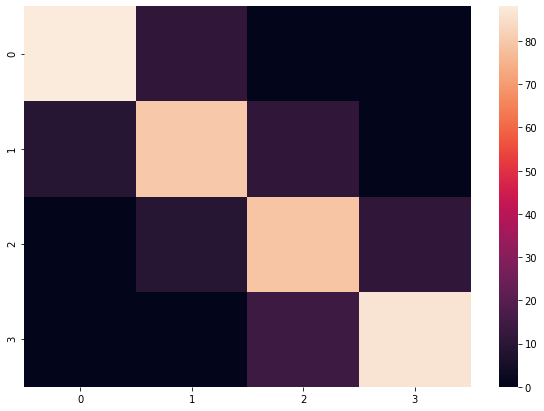

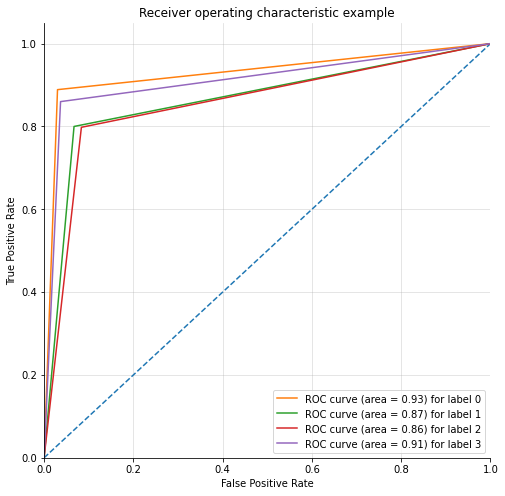

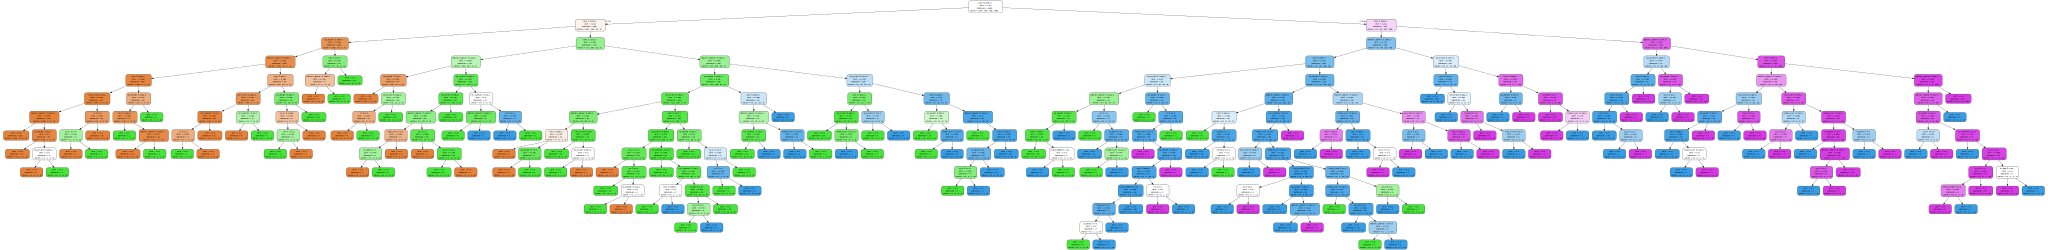

In [30]:
y = data['price_range']
X = data.drop("price_range", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


# Predict the response for test dataset
y_pred = model.predict(X_test)


cnf_matrix = confusion_matrix(y_test, y_pred)


metrics(y_test=y_test, y_pred=y_pred, cnf_matrix=cnf_matrix, model=model, X_test=X_test)


dot_data = tree.export_graphviz(model, out_file= None, feature_names=X_train.columns, filled=True, rounded= True, special_characters= True)
graph = graphviz.Source(dot_data)
graph


The above diagram generated using graphviz shows the tree structure of the decision tree.

## Running Recursive Feature Elimination with Cross Validation (RFCEV) to find the best features.

Optimal number of features : 4


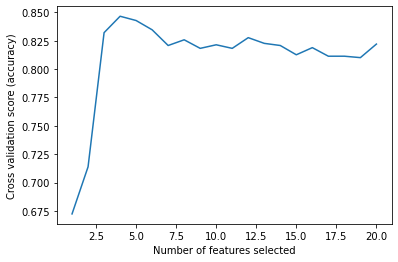

Index(['battery_power', 'px_height', 'px_width', 'ram'], dtype='object')

In [31]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

dtc = DecisionTreeClassifier(random_state=42)

# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(estimator=dtc, step=1, cv=StratifiedKFold(10),
              scoring='accuracy',
              min_features_to_select=min_features_to_select)
rfecv.fit(np.array(X_train), y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(range(min_features_to_select,
               len(rfecv.cv_results_['mean_test_score']) + min_features_to_select),
         rfecv.cv_results_['mean_test_score'])
plt.show()

X_train_pick_cv = X_train[X_train.columns[rfecv.support_]]
X_test_pick_cv = X_test[X_train.columns[rfecv.support_]]

X = data[X_train.columns[rfecv.support_]]
y = data['price_range']

X_train.columns[rfecv.support_]

## Accuracy: 0.874
## Precision (weighted): 0.876
## Precision (macro): 0.875
## Precision (micro): 0.874
## Recall (weighted): 0.874
## Recall (macro): 0.874
## Recall (micro): 0.874
## F1 Score (weighted): 0.875
## F1 Score (macro): 0.875
## F1 Score (micro): 0.874
## Mean Squared Error: 0.126
## Mean Absolute Error: 0.126
## ROC AUC Score: 0.916


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92        99
           1       0.83      0.83      0.83       100
           2       0.82      0.85      0.83        99
           3       0.93      0.91      0.92       100

    accuracy                           0.87       398
   macro avg       0.88      0.87      0.87       398
weighted avg       0.88      0.87      0.87       398

Confusion Matrix:
 [[90  9  0  0]
 [ 7 83 10  0]
 [ 0  8 84  7]
 [ 0  0  9 91]]


| Metric | 0 | 1 | 2 | 3 |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| TPR | 0.909 | 0.830 | 0.848 | 0.910 | 
| FPR | 0.023 | 0.057 | 0.064 | 0.023 | 
| TNR | 0.977 | 0.943 | 0.936 | 0.977 | 
| FNR | 0.091 | 0.170 | 0.152 | 0.090 | 
| ERR | 0.040 | 0.085 | 0.085 | 0.040 | 
| ACC | 0.960 | 0.915 | 0.915 | 0.960 | 
| F1 | 0.918 | 0.830 | 0.832 | 0.919 | 
| AUC | 0.943 | 0.886 | 0.892 | 0.943 | 


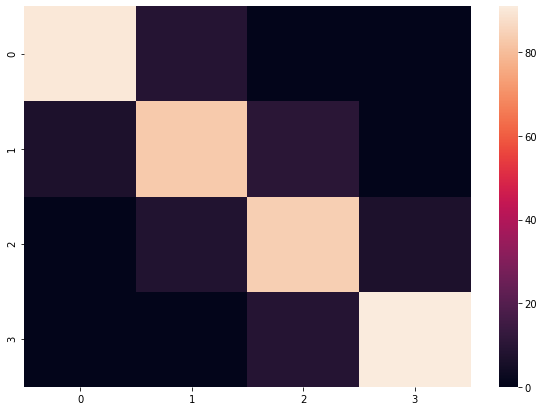

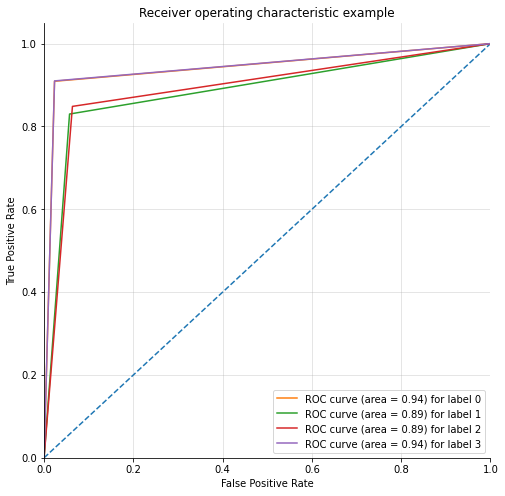

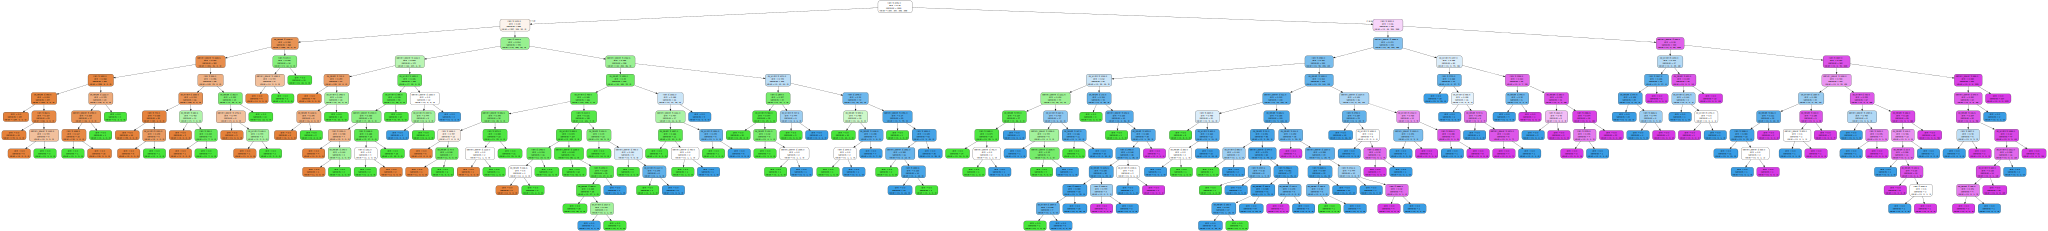

In [32]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_pick_cv, y_train)


# Predict the response for test dataset
y_pred = model.predict(X_test_pick_cv)


cnf_matrix = confusion_matrix(y_test, y_pred)


metrics(y_test=y_test, y_pred=y_pred, cnf_matrix=cnf_matrix, model=model, X_test=X_test_pick_cv)

from sklearn import tree

dot_data = tree.export_graphviz(model, out_file= None, feature_names=X_train.columns[rfecv.support_], filled=True, rounded= True, special_characters= True)
graph = graphviz.Source(dot_data)

graph

As we can see from the above results, using the best features selected using RFECV increases the accuracy of the model significantly.

In [33]:
returnTrainTestSplit = lambda X,y,split_ratio: train_test_split(X, y, test_size=split_ratio, random_state=42, stratify=y)

### Testing the accuracy of the model when we use the training data set to test the model

## Accuracy: 1.000
## Precision (weighted): 1.000
## Precision (macro): 1.000
## Precision (micro): 1.000
## Recall (weighted): 1.000
## Recall (macro): 1.000
## Recall (micro): 1.000
## F1 Score (weighted): 1.000
## F1 Score (macro): 1.000
## F1 Score (micro): 1.000
## Mean Squared Error: 0.000
## Mean Absolute Error: 0.000
## ROC AUC Score: 1.000


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       496
           1       1.00      1.00      1.00       497
           2       1.00      1.00      1.00       497
           3       1.00      1.00      1.00       498

    accuracy                           1.00      1988
   macro avg       1.00      1.00      1.00      1988
weighted avg       1.00      1.00      1.00      1988

Confusion Matrix:
 [[496   0   0   0]
 [  0 497   0   0]
 [  0   0 497   0]
 [  0   0   0 498]]


| Metric | 0 | 1 | 2 | 3 |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| TPR | 1.000 | 1.000 | 1.000 | 1.000 | 
| FPR | 0.000 | 0.000 | 0.000 | 0.000 | 
| TNR | 1.000 | 1.000 | 1.000 | 1.000 | 
| FNR | 0.000 | 0.000 | 0.000 | 0.000 | 
| ERR | 0.000 | 0.000 | 0.000 | 0.000 | 
| ACC | 1.000 | 1.000 | 1.000 | 1.000 | 
| F1 | 1.000 | 1.000 | 1.000 | 1.000 | 
| AUC | 1.000 | 1.000 | 1.000 | 1.000 | 


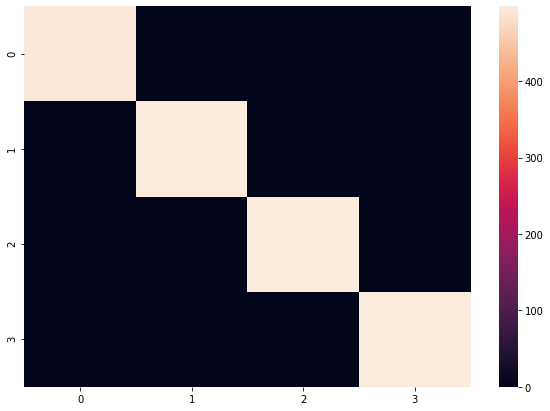

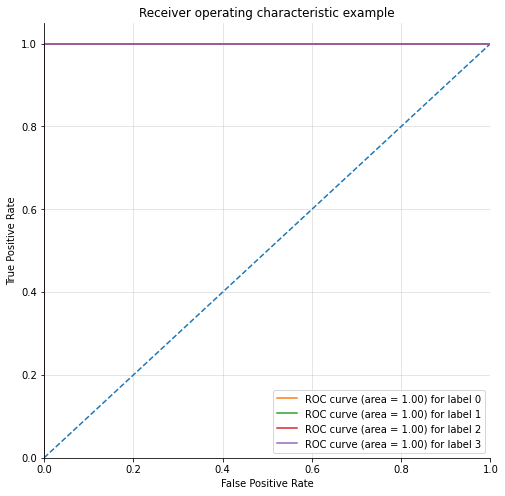

In [34]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)


# Predict the response for test dataset
y_pred = model.predict(X)


cnf_matrix = confusion_matrix(y, y_pred)


metrics(y_test=y, y_pred=y_pred, cnf_matrix=cnf_matrix, model=model, X_test=X)

So as we can see from the above results, the accuracy of the model is 1.0 which is 100% accuracy. This clearly shows that the model is overfitting.

# K-Fold Cross Validation

## K-Fold Cross Validation with different values of K

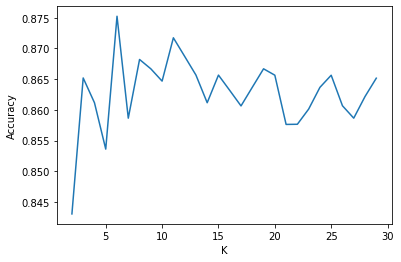

## The Best accuracy we achieve is of 0.8753 when the value of k for K-Fold Cross validation is 6

In [35]:
from sklearn.model_selection import cross_val_score

def kFoldTrain(X,y,k): 
  
  # X_train, X_test, y_train, y_test = returnTrainTestSplit(X,y,split_ratio) 
   
  clf = DecisionTreeClassifier(random_state=42) 
   
  scores = cross_val_score(clf, X, y, cv=k) 
 
  return scores

printmd("# K-Fold Cross Validation")

printmd(f'## K-Fold Cross Validation with different values of K')

r = range(2,30)

a = [kFoldTrain(X,y,i).mean() for i in r]

best_k = r[np.argmax(a)]

plt.plot(r, a)

plt.xlabel('K')
plt.ylabel('Accuracy')

plt.show()

printmd(f'## The Best accuracy we achieve is of {np.max(a):.4f} \
when the value of k for K-Fold Cross validation is {best_k}')

However after cross validation, the accuracy peaks at a much more realistic value of around 87%.

The plot above shows the accuracy of the model against the value for K which is the number of folds in the cross validation.

### Now we can try the J48 Algorithm with a test train split

For 10% Test data 90% 
Training data, the Test Accuracy is 0.8894, Train Accuracy is 1.0000



For 20% Test data 80% 
Training data, the Test Accuracy is 0.8618, Train Accuracy is 1.0000



For 30% Test data 70% 
Training data, the Test Accuracy is 0.8643, Train Accuracy is 1.0000



For 40% Test data 60% 
Training data, the Test Accuracy is 0.8580, Train Accuracy is 1.0000



For 50% Test data 50% 
Training data, the Test Accuracy is 0.8441, Train Accuracy is 1.0000



For 60% Test data 40% 
Training data, the Test Accuracy is 0.8516, Train Accuracy is 1.0000



For 70% Test data 30% 
Training data, the Test Accuracy is 0.8175, Train Accuracy is 1.0000



For 80% Test data 20% 
Training data, the Test Accuracy is 0.8033, Train Accuracy is 1.0000



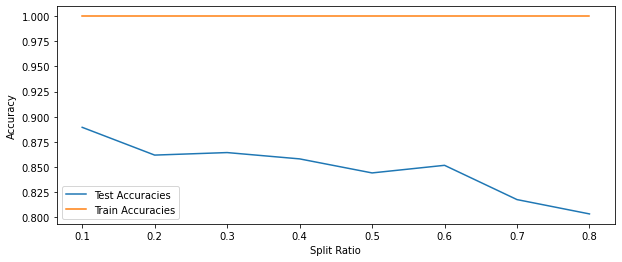

In [36]:
test_accuracy_score_list = []
train_accuracy_score_list = []

r = np.arange(0.1, 0.9, 0.1)

for i in r:
    X_train, X_test, y_train, y_test = returnTrainTestSplit(X,y,i) 

    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)


    # Predict the response for test dataset
    y_pred = model.predict(X_test)

    test_accuracy_score_list.append(accuracy_score(y_test, y_pred))

    # Predict the response for test dataset
    y_pred_train = model.predict(X_train)

    train_accuracy_score_list.append(accuracy_score(y_train, y_pred_train))

    printmd(f'For {round(i*100)}% Test data {round((1-i)*100)}% \nTraining data, the Test Accuracy is {test_accuracy_score_list[-1]:.4f}, Train Accuracy is {train_accuracy_score_list[-1]:.4f}\n\n')

best_split_ratio = r[np.argmax(test_accuracy_score_list)]


plt.figure(figsize=(10,4))

plt.plot(r, test_accuracy_score_list, label='Test Accuracy')

plt.plot(r, train_accuracy_score_list, label='Train Accuracy')

plt.xlabel('Split Ratio')
plt.ylabel('Accuracy')

plt.legend(['Test Accuracies', 'Train Accuracies'])


plt.show()

### From the above results, we can see that the test accuracy of the model goes down as the test size increases. We can also note that the accuracy for the predictions made with the training data are always 100% which means the model is overfitting.

For depth 2, the Test Accuracy is 0.7889, Train Accuracy is 0.7568
For depth 3, the Test Accuracy is 0.7739, Train Accuracy is 0.7641
For depth 4, the Test Accuracy is 0.7990, Train Accuracy is 0.8379
For depth 5, the Test Accuracy is 0.8241, Train Accuracy is 0.8681
For depth 6, the Test Accuracy is 0.8744, Train Accuracy is 0.9117
For depth 7, the Test Accuracy is 0.8844, Train Accuracy is 0.9469
For depth 8, the Test Accuracy is 0.8945, Train Accuracy is 0.9765
For depth 9, the Test Accuracy is 0.8844, Train Accuracy is 0.9866
For depth 10, the Test Accuracy is 0.8794, Train Accuracy is 0.9955
For depth 11, the Test Accuracy is 0.8894, Train Accuracy is 1.0000
For depth 12, the Test Accuracy is 0.8894, Train Accuracy is 1.0000
For depth 13, the Test Accuracy is 0.8894, Train Accuracy is 1.0000
For depth 14, the Test Accuracy is 0.8894, Train Accuracy is 1.0000
For depth 15, the Test Accuracy is 0.8894, Train Accuracy is 1.0000
For depth 16, the Test Accuracy is 0.8894, Train Accurac

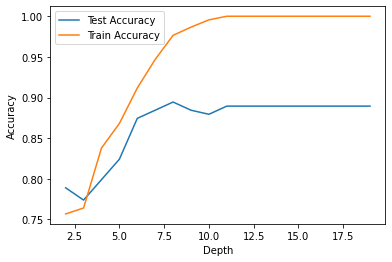

In [37]:
test_accuracy_score_list = []
train_accuracy_score_list = []

for i in range(2,20):
    X_train, X_test, y_train, y_test = returnTrainTestSplit(X,y,best_split_ratio) 

    model = DecisionTreeClassifier(max_depth=i, random_state=42)
    model.fit(X_train, y_train)


    # Predict the response for test dataset
    y_pred = model.predict(X_test)

    test_accuracy_score_list.append(accuracy_score(y_test, y_pred))

    # Predict the response for test dataset
    y_pred_train = model.predict(X_train)

    train_accuracy_score_list.append(accuracy_score(y_train, y_pred_train))

    print(f'For depth {i}, the Test Accuracy is {test_accuracy_score_list[-1]:.4f}, Train Accuracy is {train_accuracy_score_list[-1]:.4f}')

plt.plot(range(2,20), test_accuracy_score_list)
plt.plot(range(2,20), train_accuracy_score_list)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend(['Test Accuracy', 'Train Accuracy'])
plt.show()

We notice a similar trend when changing the max depth of the decision tree.

For Min Samples Leaf 1, the Test Accuracy is 0.8894, Train Accuracy is 1.0000
For Min Samples Leaf 2, the Test Accuracy is 0.8995, Train Accuracy is 0.9754
For Min Samples Leaf 3, the Test Accuracy is 0.8945, Train Accuracy is 0.9642
For Min Samples Leaf 4, the Test Accuracy is 0.8945, Train Accuracy is 0.9475
For Min Samples Leaf 5, the Test Accuracy is 0.8945, Train Accuracy is 0.9402
For Min Samples Leaf 6, the Test Accuracy is 0.8894, Train Accuracy is 0.9318
For Min Samples Leaf 7, the Test Accuracy is 0.8844, Train Accuracy is 0.9245
For Min Samples Leaf 8, the Test Accuracy is 0.8794, Train Accuracy is 0.9201
For Min Samples Leaf 9, the Test Accuracy is 0.8744, Train Accuracy is 0.9201
For Min Samples Leaf 10, the Test Accuracy is 0.8744, Train Accuracy is 0.9178
For Min Samples Leaf 11, the Test Accuracy is 0.8744, Train Accuracy is 0.9162
For Min Samples Leaf 12, the Test Accuracy is 0.8744, Train Accuracy is 0.9122
For Min Samples Leaf 13, the Test Accuracy is 0.8593, Train A

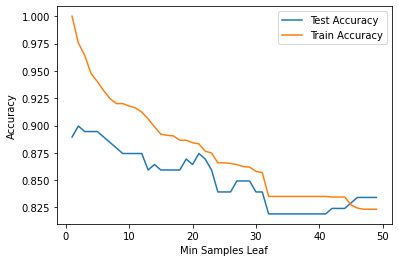

In [38]:
test_accuracy_score_list = []
train_accuracy_score_list = []

r= range(1,50)

for i in r:
    X_train, X_test, y_train, y_test = returnTrainTestSplit(X,y,best_split_ratio) 

    model = DecisionTreeClassifier(min_samples_leaf=i, random_state=42)
    model.fit(X_train, y_train)


    # Predict the response for test dataset
    y_pred = model.predict(X_test)

    test_accuracy_score_list.append(accuracy_score(y_test, y_pred))

    # Predict the response for test dataset
    y_pred_train = model.predict(X_train)

    train_accuracy_score_list.append(accuracy_score(y_train, y_pred_train))

    print(f'For Min Samples Leaf {i}, the Test Accuracy is {test_accuracy_score_list[-1]:.4f}, Train Accuracy is {train_accuracy_score_list[-1]:.4f}')

plt.plot(r, test_accuracy_score_list)
plt.plot(r, train_accuracy_score_list)
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')
plt.legend(['Test Accuracy', 'Train Accuracy'])
plt.show()

Changing this parameter results in a much generalised model which is not overfitting. This can be seen in the plot above where it is clearly evident that the accuracy of the model given the test and training data cross at some point which is a good sign and shows the model is generalised.

For Min Samples Split 2, the Test Accuracy is 0.8894, Train Accuracy is 1.0000
For Min Samples Split 3, the Test Accuracy is 0.8894, Train Accuracy is 0.9978
For Min Samples Split 4, the Test Accuracy is 0.8844, Train Accuracy is 0.9894
For Min Samples Split 5, the Test Accuracy is 0.8693, Train Accuracy is 0.9866
For Min Samples Split 6, the Test Accuracy is 0.8894, Train Accuracy is 0.9793
For Min Samples Split 7, the Test Accuracy is 0.8894, Train Accuracy is 0.9698
For Min Samples Split 8, the Test Accuracy is 0.8945, Train Accuracy is 0.9642
For Min Samples Split 9, the Test Accuracy is 0.8995, Train Accuracy is 0.9603
For Min Samples Split 10, the Test Accuracy is 0.8945, Train Accuracy is 0.9570
For Min Samples Split 11, the Test Accuracy is 0.8844, Train Accuracy is 0.9503
For Min Samples Split 12, the Test Accuracy is 0.8894, Train Accuracy is 0.9463
For Min Samples Split 13, the Test Accuracy is 0.8894, Train Accuracy is 0.9424
For Min Samples Split 14, the Test Accuracy is 0

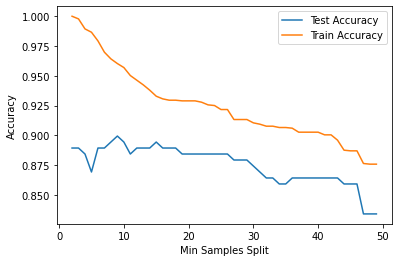

In [39]:
test_accuracy_score_list = []
train_accuracy_score_list = []

r= range(2,50)

for i in r:
    X_train, X_test, y_train, y_test = returnTrainTestSplit(X,y,best_split_ratio) 

    model = DecisionTreeClassifier(min_samples_split=i, random_state=42)
    model.fit(X_train, y_train)


    # Predict the response for test dataset
    y_pred = model.predict(X_test)

    test_accuracy_score_list.append(accuracy_score(y_test, y_pred))

    # Predict the response for test dataset
    y_pred_train = model.predict(X_train)

    train_accuracy_score_list.append(accuracy_score(y_train, y_pred_train))

    print(f'For Min Samples Split {i}, the Test Accuracy is {test_accuracy_score_list[-1]:.4f}, Train Accuracy is {train_accuracy_score_list[-1]:.4f}')

plt.plot(r, test_accuracy_score_list)
plt.plot(r, train_accuracy_score_list)
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.legend(['Test Accuracy', 'Train Accuracy'])
plt.show()

Changing this parameter also yeilds a similar result as when changing the min_samples_leaf parameter.

## Conclusion

From the experiments conducted, we can see that the accuracy of the model is 1.0  when there is no split which is 100% accuracy. This clearly shows that the model is overfitting. We overcame this by trying K-fold cross validation which gave realistic accuracies then we went on to try the J48 Algorithm with a test train split which also gave us realistic accuracies and generalised the model. We can see that the model is more prone to overfitting as the test size decreases i.e. with higher training data size, the model learns the data hence overfits. We experimented with different values of K and max_depth and min_samples_leaf to find the best values for these parameters which would generalize the model and reduce the overfitting.

## Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = returnTrainTestSplit(X,y,0.2)
model = RandomForestClassifier(random_state=42,verbose=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


## Accuracy: 0.917
## Precision (weighted): 0.917
## Precision (macro): 0.917
## Precision (micro): 0.917
## Recall (weighted): 0.917
## Recall (macro): 0.917
## Recall (micro): 0.917
## F1 Score (weighted): 0.917
## F1 Score (macro): 0.917
## F1 Score (micro): 0.917
## Mean Squared Error: 0.083
## Mean Absolute Error: 0.083
## ROC AUC Score: 0.991


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        99
           1       0.89      0.89      0.89       100
           2       0.89      0.88      0.88        99
           3       0.96      0.93      0.94       100

    accuracy                           0.92       398
   macro avg       0.92      0.92      0.92       398
weighted avg       0.92      0.92      0.92       398

Confusion Matrix:
 [[96  3  0  0]
 [ 7 89  4  0]
 [ 0  8 87  4]
 [ 0  0  7 93]]


| Metric | 0 | 1 | 2 | 3 |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| TPR | 0.970 | 0.890 | 0.879 | 0.930 | 
| FPR | 0.023 | 0.037 | 0.037 | 0.013 | 
| TNR | 0.977 | 0.963 | 0.963 | 0.987 | 
| FNR | 0.030 | 0.110 | 0.121 | 0.070 | 
| ERR | 0.025 | 0.055 | 0.058 | 0.028 | 
| ACC | 0.975 | 0.945 | 0.942 | 0.972 | 
| F1 | 0.950 | 0.890 | 0.883 | 0.944 | 
| AUC | 0.973 | 0.927 | 0.921 | 0.958 | 


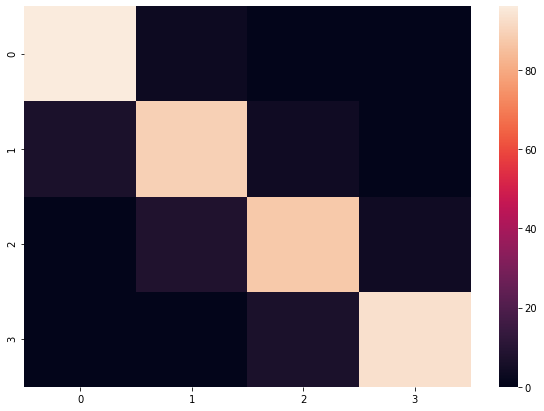

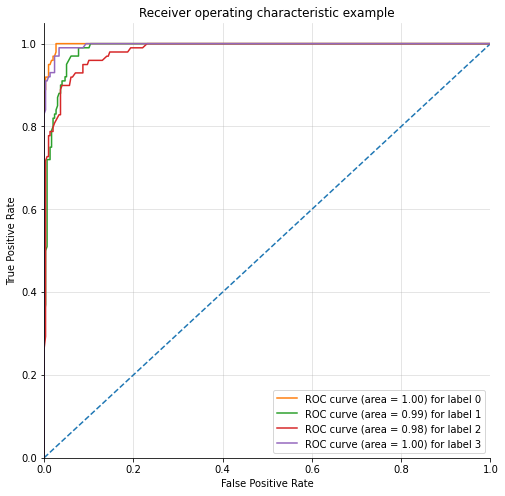

In [41]:
metrics(y_test=y_test, y_pred=y_pred, cnf_matrix=cnf_matrix, model=model, X_test=X_test)